In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy.io as sio

In [2]:
data = pd.read_csv("marriage.csv",header=None)

In [3]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [4]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y, train_size = 0.8,shuffle = True)

In [5]:
svmClassifier = SVC()
neuralNet = MLPClassifier(hidden_layer_sizes=(5,2),activation='logistic')

In [6]:
svmClassifier.fit(xtrain,ytrain)

/Users/ajspsp/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
neuralNet.fit(xtrain,ytrain)

/Users/ajspsp/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
print("The accuracy of the SVC classifier is {:.2f}%".format(svmClassifier.score(xtest,ytest)*100))
print("The accuracy of the Neural Network classifier is {:.2f}%".format(neuralNet.score(xtest,ytest)*100))

The accuracy of the SVC classifier is 97.06%
The accuracy of the Neural Network classifier is 97.06%


# Part b
Using first 2 features

In [16]:
x = data.iloc[:,0:2]
y = data.iloc[:,-1]
xtrain, xtest, ytrain,ytest = train_test_split(x,y, train_size = 0.8,shuffle = True)

In [17]:
svmClassifier2 = SVC(probability=True, kernel='linear')
neuralNet2 = MLPClassifier(hidden_layer_sizes=(5,2),activation='logistic')

In [18]:
svmClassifier2.fit(xtrain,ytrain)
neuralNet2.fit(xtrain,ytrain)

/Users/ajspsp/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
print("The accuracy of the SVC classifier is {:.2f}%".format(svmClassifier2.score(xtest,ytest)*100))
print("The accuracy of the Neural Network classifier is {:.2f}%".format(neuralNet2.score(xtest,ytest)*100))

The accuracy of the SVC classifier is 94.12%
The accuracy of the Neural Network classifier is 67.65%


In [20]:
X1 = xtest.values
h = 0.1
xtrain1 = xtrain.values
xtest1 = xtest.values
ytrain1 = ytrain.values
ytest1 = ytest.values

[]

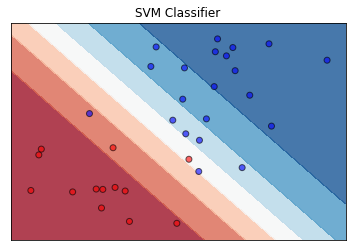

In [21]:
# Code referenced from sklearn:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
x_min, x_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
y_min, y_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1,  1, 1)

ax.set_title("SVM Classifier")


Z = svmClassifier2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
# ax.scatter(xtrain1[:, 0], xtrain1[:, 1], c=ytrain1, cmap=cm_bright,
#            edgecolors='k')
# Plot the testing points
ax.scatter(xtest1[:, 0], xtest1[:, 1], c=ytest1, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

[]

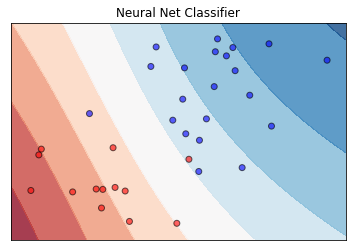

In [22]:
# Code referenced from sklearn:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
x_min, x_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
y_min, y_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1,  1, 1)

ax.set_title("Neural Net Classifier")


Z = neuralNet2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
# ax.scatter(xtrain1[:, 0], xtrain1[:, 1], c=ytrain1, cmap=cm_bright,
#            edgecolors='k')
# Plot the testing points
ax.scatter(xtest1[:, 0], xtest1[:, 1], c=ytest1, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

# Part 2 - MNIST


In [23]:
data = sio.loadmat('data/data.mat')
label = sio.loadmat('data/label.mat')

In [24]:
images = data['data']
labels = label['trueLabel'][0]
labels[labels == 2] = 0
labels[labels == 6] = 1

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(images.T, labels, train_size = 0.8)

In [30]:
svmClassifier3 = SVC(probability=True)
neuralNet3 = MLPClassifier(hidden_layer_sizes=(5,2),activation='logistic')

In [31]:
svmClassifier3.fit(xtrain,ytrain)
neuralNet3.fit(xtrain,ytrain)

/Users/ajspsp/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ajspsp/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
print("The accuracy of the SVC classifier is {:.2f}%".format(svmClassifier3.score(xtest,ytest)*100))
print("The accuracy of the Neural Network classifier is {:.2f}%".format(neuralNet3.score(xtest,ytest)*100))

The accuracy of the SVC classifier is 96.73%
The accuracy of the Neural Network classifier is 97.24%
